In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from scipy.constants import c
from scipy.optimize import curve_fit

#%matplotlib qt

plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
offset =  400
f_carrier = 2203.201e6 + offset

In [3]:
data = np.fromfile('/media/scott/fast/1k/2023-07-14T19:46:16_2203.201_8049_70001.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
amp_data = data[:,2]

In [4]:
gmd_file = '/home/scott/Dropbox/satobs/ch3/ch3_jpl.txt'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[0:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_mjd = gmd_mjd - 2400000.5
gmd_rangerate = np.array(gmd_rangerate)

#NOTE: 2022-12-09 - Found that this piece of code was set to scale = 'tai'! Changing this to 'utc' fixed the parobolic curve shape of the residuals and flattened them out.  I believe GMAT outputs TAI and Horizons UTC.
t_gmd = Time(gmd_mjd , scale = 'utc', format = 'mjd')

In [5]:
f_gmat = f_carrier * (1 - 1e3*gmd_rangerate/c)

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

Rr = (c * ((freq_data / f_carrier) -1))/-1000

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

Rr_diff = Rr-rangerate_interp
np_rrdiff = np.array(Rr_diff)

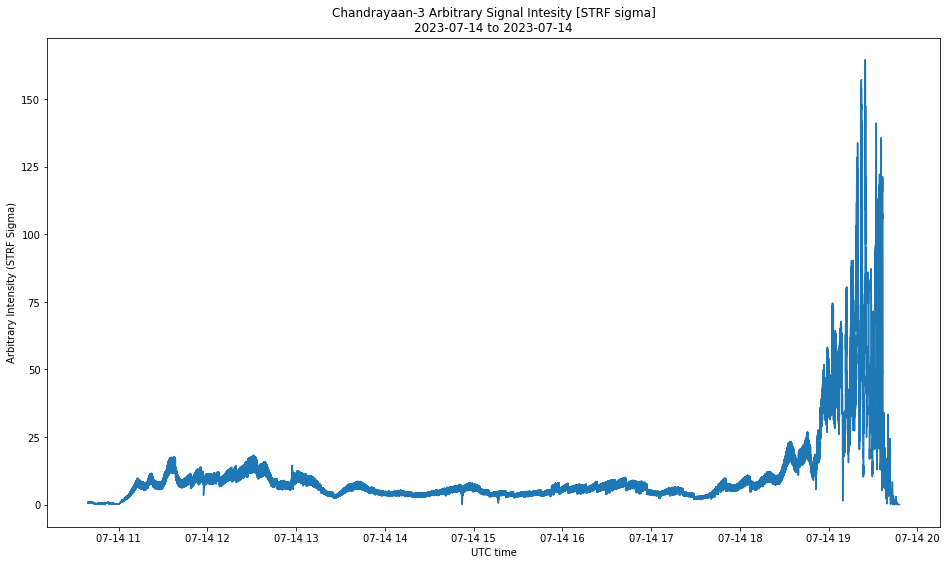

In [6]:
plt.plot(t_data.datetime,amp_data,markersize=1, alpha=1, label = 'VE7TIL data')
plt.title('Chandrayaan-3 Arbitrary Signal Intesity [STRF sigma]\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%d'), t_data.datetime[len(freq_data)-1].strftime('%Y-%m-%d')))
plt.ylabel('Arbitrary Intensity (STRF Sigma)')
plt.xlabel('UTC time')
plt.show();

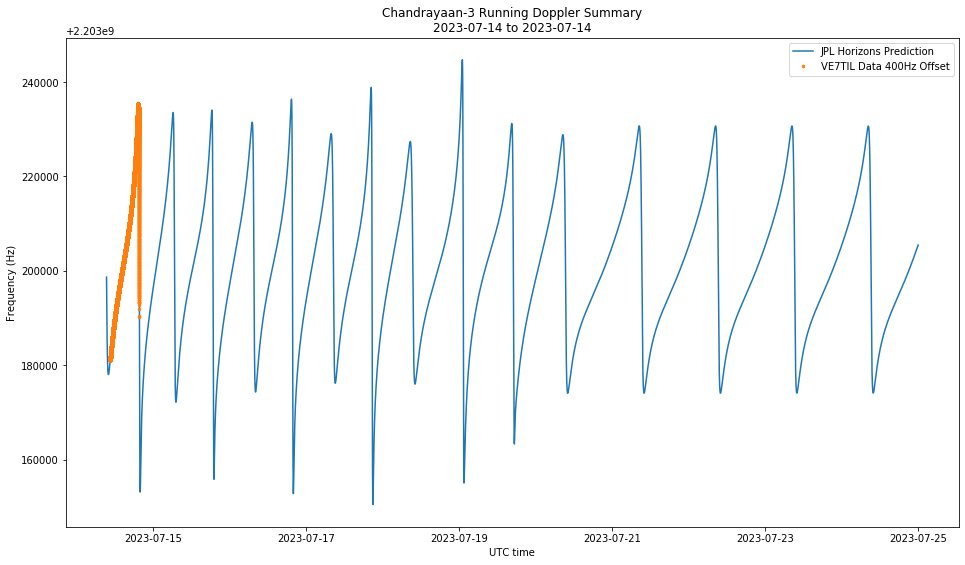

In [7]:
plt.plot(t_gmd.datetime, f_gmat, markersize=1,alpha=1,label = 'JPL Horizons Prediction')
plt.plot(t_data.datetime,freq_data,'.' ,markersize=5, alpha=2, label = 'VE7TIL Data %sHz Offset'%(offset))
plt.title('Chandrayaan-3 Running Doppler Summary\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%d'), t_data.datetime[len(freq_data)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.show();

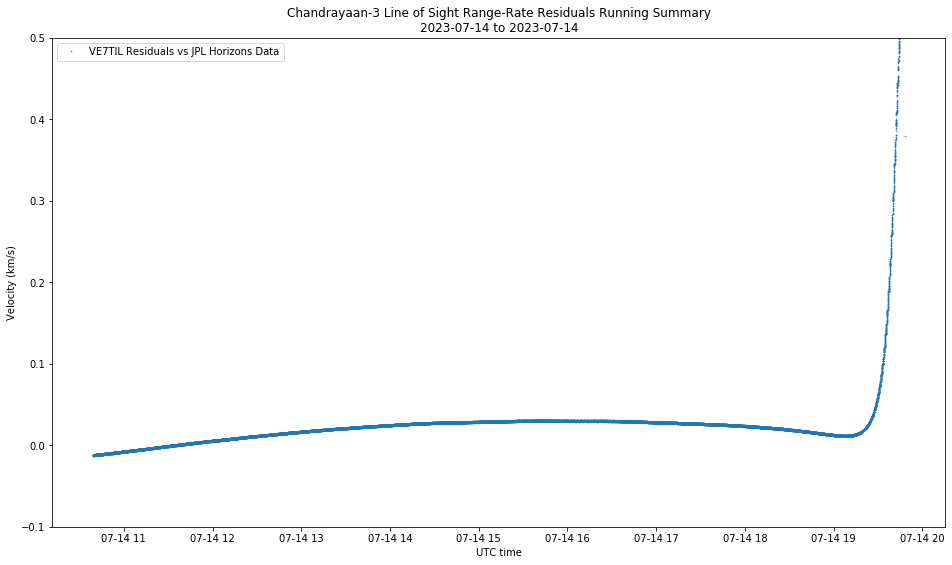

In [9]:
plt.ylim( np.max(-.1), np.min(.5))
plt.plot(t_data.datetime, Rr - rangerate_interp,'.',markersize=1,  label = 'VE7TIL Residuals vs JPL Horizons Data')
plt.title('Chandrayaan-3 Line of Sight Range-Rate Residuals Running Summary\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%d'), t_data.datetime[len(freq_data)-1].strftime('%Y-%m-%d')))
plt.ylabel('Velocity (km/s)')
plt.xlabel('UTC time')
plt.legend()
plt.show();

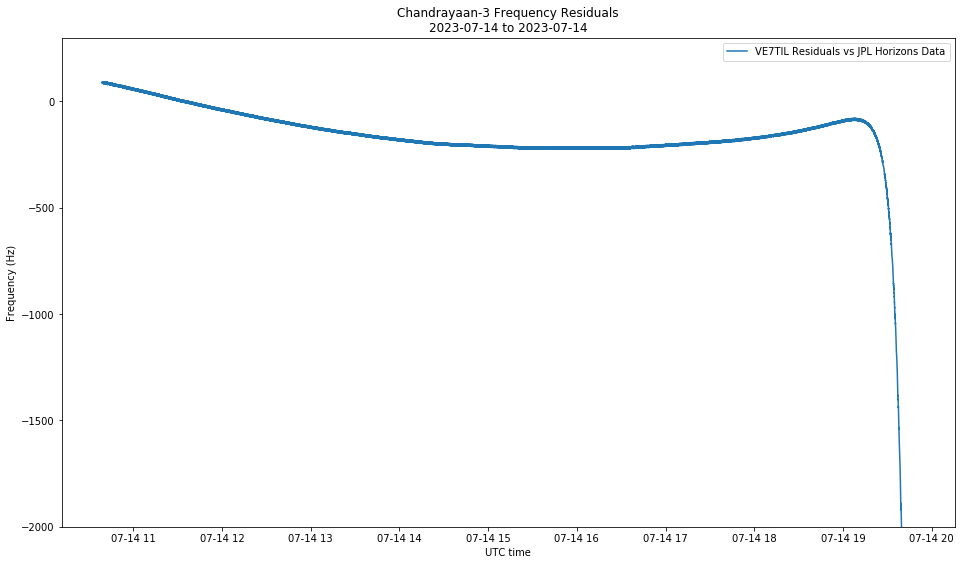

In [10]:
plt.ylim(-2000,300)
plt.plot(t_data.datetime, freq_data - freq_gmat,markersize=1,  label = 'VE7TIL Residuals vs JPL Horizons Data')
plt.title('Chandrayaan-3 Frequency Residuals\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%d'), t_data.datetime[len(freq_data)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.show();